In [24]:
import pdb

import numpy as np
import scipy.optimize as op
import scipy.special as spec
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns
import astropy
from astropy import stats as astrostats
import radvel
%matplotlib inline

# Assuming a polished list of known planets and candidates in the legacy sample, explore and visualize properties such as mass, host star metallicity, etc.

In [2]:
data = pd.read_csv('legacy_tables/system_props_719.csv')

In [3]:
specmatch = pd.read_csv('/Users/lee/Academics/Astronomy/Planets/legacy_analysis/legacy_tables/legacy_specmatch_medians.csv')

In [4]:
len(specmatch)

745

In [5]:
masses_only = pd.read_csv('legacy_tables/planet_list_719.csv')

## Sort the planets into real, new candidates, known.

In [6]:
#masses_real = masses_real.loc[masses_real.status != 'B'].reset_index(drop=True)

masses_real = masses_only.query('status != "N" and status != "A"').reset_index(drop=True)
masses_good = masses_real.query('mass != "nan"').reset_index(drop=True)#[masses_only.hostname != 'hip63510']
masses_s = masses_good.query('status == "S" or status == "SS"').reset_index(drop=True)
masses_planet = masses_good.query('status != "S" and status != "SS"').reset_index(drop=True)
masses_old  = masses_planet.query('status == "K"').reset_index(drop=True)
masses_new  = masses_planet.query('status == "C" or status == "J"').reset_index(drop=True)

In [200]:
masses_s.query('status == "SS"')
#masses_good.query('hostname == "116321"')

,Unnamed: 0,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,per_minus,per_plus,k,k_med,k_minus,k_plus,e,e_med,e_minus,e_plus
3,32,116321,SS,50.662192,130.550149,74.569845,226.267222,7.726527,16.282146,8.735236,...,7879.896862,59098.778241,435.279112,844.464984,566.243664,1810.602398,0.107801,0.641658,0.308283,0.825405
8,71,157338,SS,124.416924,146.258736,99.582039,199.964474,17.543707,24.328158,17.277640,...,26447.880660,71035.054449,990.658489,1064.700778,752.437988,1436.283555,0.605454,0.680955,0.610324,0.748611
33,228,87359,SS,56.424887,147.143529,76.199497,261.851676,14.558902,20.789006,16.006022,...,23717.585175,48023.930877,427.305766,856.082769,522.898405,1327.831028,0.082663,0.160501,0.105506,0.220733
35,234,4747,SS,48.088313,49.144831,47.490647,50.825784,9.774699,9.855719,9.681936,...,12234.192754,12657.223719,702.272279,718.548083,706.691438,730.400474,0.728044,0.731333,0.729712,0.732968
39,261,139457,SS,102.148232,170.889676,85.346178,388.694105,21.942127,36.905780,22.828550,...,42910.648671,174533.785012,710.772357,1050.007873,579.015875,1977.587696,0.485541,0.617546,0.436024,0.769011
44,268,239960,SS,57.254745,81.777702,66.757646,94.061159,12.070671,19.112999,13.797723,...,23253.994026,59169.585587,648.584245,772.258323,686.727267,835.130096,0.441833,0.608797,0.494784,0.695354
50,289,127506,SS,35.571482,35.534868,34.587518,36.484234,3.370110,3.373408,3.325292,...,2641.600088,2683.585072,897.260818,896.184799,892.737748,899.745300,0.691646,0.691684,0.687659,0.695862


In [181]:
print(len(masses_new), len(masses_old))

22 159


In [7]:
masses_new

,Unnamed: 0,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,per_minus,per_plus,k,k_med,k_minus,k_plus,e,e_med,e_minus,e_plus
0,1,145675,C,5.930104,6.186677,5.341438,7.168676,15.947416,17.505125,13.998808,...,19175.274377,40530.007386,46.782006,47.576763,43.540532,52.143361,0.427951,0.465702,0.362407,0.574290
1,22,111031,C,12.056604,32.914010,17.629905,57.284030,12.811619,24.715374,17.297921,...,24594.650355,66414.425194,90.729560,180.432225,110.876447,295.780887,0.163842,0.326113,0.154414,0.465122
2,49,136925,C,0.945799,1.005890,0.823408,1.656874,4.980120,5.307153,5.013891,...,4419.452355,5183.052633,18.456355,14.974557,11.428199,35.176019,0.712327,0.389060,0.093276,0.768442
3,52,141004,C,0.044406,0.043573,0.038741,0.048470,0.123548,0.123558,0.120797,...,15.506104,15.509657,3.575406,3.527288,3.153422,3.896214,0.187523,0.170833,0.066116,0.279786
4,68,156668,C,0.099188,0.096316,0.087852,0.104975,1.559897,1.560475,1.539494,...,806.987064,816.860605,2.608918,2.528189,2.311370,2.751140,0.161054,0.115431,0.038650,0.206340
5,81,164922,C,0.034803,0.033749,0.030469,0.037038,0.229434,0.229438,0.226372,...,41.748747,41.773118,2.167503,2.104247,1.904826,2.302513,0.129948,0.097173,0.029314,0.188822
6,82,164922,C,0.015228,0.014572,0.012372,0.016789,0.102439,0.102435,0.101067,...,12.455752,12.460122,1.433398,1.391642,1.179177,1.624007,0.190084,0.184009,0.055797,0.375051
7,86,168009,C,0.033017,0.032481,0.028924,0.036136,0.119143,0.119141,0.116973,...,15.144790,15.150667,2.801546,2.747435,2.458445,3.044453,0.204126,0.137987,0.044799,0.256687
8,111,190360,C,0.029927,0.028929,0.024988,0.032861,0.393159,0.393153,0.385167,...,88.573991,88.792994,1.359634,1.326501,1.148409,1.501698,0.183084,0.164210,0.050874,0.304093
9,128,201092,C,0.021110,0.020435,0.017257,0.023678,0.220153,0.220198,0.217350,...,48.999624,49.074327,1.682329,1.646011,1.393821,1.905467,0.154129,0.147728,0.044915,0.293155


In [10]:
mass = masses_good.mass
mold = masses_old.mass
aold = masses_old.axis
a    = masses_good.axis
perold = masses_old.per
per    = masses_good.per

## Pull Specmatch metallicities into planet properties. In 'Masses_good_with_specmatch'.

In [15]:
masses_good.columns

Index(['Unnamed: 0', 'hostname', 'status', 'mass', 'mass_med', 'mass_minus',
       'mass_plus', 'axis', 'axis_med', 'axis_minus', 'axis_plus', 'per',
       'per_med', 'per_minus', 'per_plus', 'k', 'k_med', 'k_minus', 'k_plus',
       'e', 'e_med', 'e_minus', 'e_plus'],
      dtype='object')

In [18]:
specmatch.columns

Index(['Unnamed: 0', 'name', 'teff', 'teff_err', 'logg', 'logg_err', 'fe',
       'fe_err', 'vsini', 'iso_mass', 'iso_mass_err1', 'iso_mass_err2',
       'iso_radius', 'iso_radius_err1', 'iso_radius_err2', 'iso_logage',
       'iso_logage_err1', 'iso_logage_err2', 'iso_age_err1', 'iso_age_err2',
       'iso_teff', 'iso_teff_err1', 'iso_teff_err2', 'iso_logg',
       'iso_logg_err1', 'iso_logg_err2', 'iso_fe', 'iso_fe_err1',
       'iso_fe_err2', 'teff_emp', 'teff_err_emp', 'radius_emp',
       'radius_err_emp', 'fe_emp', 'fe_err_emp'],
      dtype='object')

In [19]:
merge_columns = list(masses_good.columns)
merge_columns.append('fe')
m_good_spec = pd.DataFrame(columns=merge_columns)

masses_good['name'] = masses_good['hostname']
m_good_spec = pd.merge(masses_good, specmatch, on=['name'])#,suffixes=['_syn','_emp'])

In [20]:
len(m_good_spec)

239

## Take a look at imaging candidates.

In [21]:
imaging_names = ['145675', '111031', '26161', '213472', '203473', '127506', '150554']

In [22]:
imaging_spec = m_good_spec.query('name in ["145675", "111031", "26161", "213472", "203473", "127506", "150554"]')

In [23]:
imaging_spec[['name', 'e_med', 'iso_mass', 'mass', 'mass_minus', 'axis', 'axis_minus', 'axis_med', 'axis_plus', 'iso_logage', 'iso_logage_err1']]

,name,e_med,iso_mass,mass,mass_minus,axis,axis_minus,axis_med,axis_plus,iso_logage,iso_logage_err1
0,145675,0.366356,0.997165,4.910311,4.787921,2.857071,2.816439,2.856997,2.896420,10.022388,0.078579
1,145675,0.465702,0.997165,5.930104,5.341438,15.947416,13.998808,17.505125,23.071287,10.022388,0.078579
17,111031,0.326113,1.144993,12.056604,17.629905,12.811619,17.297921,24.715374,33.583950,9.759124,0.126760
104,213472,0.566000,1.049956,3.299509,2.644000,10.830312,11.110000,13.750000,19.400000,9.913873,0.094715
122,26161,0.753400,1.112582,4.672000,4.041000,14.940000,11.750000,14.940000,19.090000,9.696456,0.116003
224,127506,0.691684,0.722771,35.571482,34.587518,3.370110,3.325292,3.373408,3.421595,9.795882,0.251746


## Filter out planet candidates beyond 2 AU and above 0.1 M_Jup, and stars with measured metallicity < -0.6 (bad measurement).

In [24]:
good_spec_filter = m_good_spec.query('axis < 5 and mass > 0.1 and (status == "K" or status == "C")')#('fe > -0.6 and axis < 5 and mass > 0.1')
print(len(m_good_spec), len(good_spec_filter))
good_spec_filter.sort_values('mass')

239 114


,Unnamed: 0_x,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,iso_logg_err2,iso_fe,iso_fe_err1,iso_fe_err2,teff_emp,teff_err_emp,radius_emp,radius_err_emp,fe_emp,fe_err_emp
144,193,49674,K,0.117523,0.116499,0.107865,0.125288,0.058043,0.058033,0.057125,...,-0.090726,0.301469,0.061053,-0.061521,5484.0,110.0,1.1040,0.18,0.320,0.09
163,215,75732,K,0.145837,0.143718,0.129989,0.157746,0.796207,0.796004,0.784924,...,-0.094356,0.393148,0.047541,-0.056432,5270.0,110.0,0.9405,0.10,0.475,0.09
131,175,3765,C,0.179048,0.174721,0.154539,0.194935,2.136316,2.123185,2.085791,...,-0.039115,0.169588,0.062326,-0.061180,4997.5,110.0,0.7990,0.10,0.220,0.09
162,213,75732,K,0.179994,0.179062,0.170428,0.187899,0.244238,0.244238,0.240849,...,-0.094356,0.393148,0.047541,-0.056432,5270.0,110.0,0.9405,0.10,0.475,0.09
187,243,97101,C,0.185938,0.184352,0.171917,0.197086,1.402472,1.403789,1.385884,...,-0.019606,-0.106732,0.058717,-0.062085,4124.0,70.0,0.6740,0.10,0.180,0.09
121,158,24040,C,0.204980,0.195566,0.166180,0.225856,1.310851,1.309277,1.274816,...,-0.087648,0.201719,0.058991,-0.059934,5739.0,110.0,1.0680,0.18,0.200,0.09
13,18,107148,K,0.205686,0.201883,0.182254,0.222265,0.371313,0.371341,0.363624,...,-0.091805,0.300231,0.058715,-0.058928,5670.0,110.0,1.0930,0.18,0.310,0.09
10,14,104067,K,0.205722,0.202526,0.184642,0.220515,0.267404,0.267397,0.263929,...,-0.034572,0.090960,0.058770,-0.062778,4931.0,110.0,0.7820,0.10,0.180,0.09
111,143,218566,K,0.211133,0.208114,0.186498,0.229640,0.688686,0.688632,0.680422,...,-0.036478,0.300881,0.061326,-0.061290,4771.0,110.0,0.9480,0.10,0.140,0.09
130,173,3651,K,0.221911,0.221324,0.214283,0.228435,0.295929,0.295926,0.292052,...,-0.055396,0.175240,0.061648,-0.062044,5079.0,110.0,0.9520,0.10,0.200,0.09


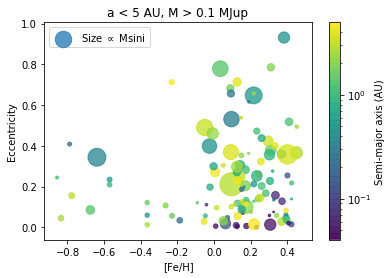

In [31]:
fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.1 MJup')
im = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(30*good_spec_filter.mass), 
                c=good_spec_filter.axis, norm=matplotlib.colors.LogNorm(), alpha=0.75, label=r'Size $\propto$ Msini')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Eccentricity')
#ax.set_xlim([-0.3, 0.5])
ax.legend(loc=0)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Semi-major axis (AU)')#, rotation=270)
fig.savefig('planet_candidates/fe_eccentricity_m05.pdf')

## Look at low-metallicity host stars.

In [26]:
good_spec_filter.query('fe < -0.1')[['hostname', 'per', 'mass', 'iso_mass', 
                                     'teff_emp', 'fe', 'fe_emp', 'e']]

,hostname,per,mass,iso_mass,teff_emp,fe,fe_emp,e
4,155358,194.487979,0.813886,0.800707,5979.0,-0.569934,-0.490,0.234480
5,155358,389.028569,0.677862,0.800707,5979.0,-0.569934,-0.490,0.209267
20,114729,1133.062154,0.867743,0.894359,5713.0,-0.264197,-0.325,0.107211
21,114762,83.917559,10.656444,0.781907,6010.0,-0.639222,-0.490,0.343935
41,136925,4363.647716,0.945799,0.865400,5647.0,-0.230876,-0.450,0.712327
50,143761,39.843480,1.048202,0.899121,5666.0,-0.187020,-0.300,0.034234
138,4208,830.839988,0.775791,0.839514,5611.5,-0.228754,-0.375,0.056340
212,gl317,694.459708,2.430120,0.681177,3393.5,-0.675216,0.245,0.085303
215,hip109388,1940.683973,1.030342,0.625679,3514.0,-0.835325,0.430,0.044826
217,hip22627,2334.874241,1.163253,0.661011,3350.5,-0.776834,0.145,0.155343


## Overplot total sample histogram in metallicity, and eccentricity/metallicity scatterplot for planets.

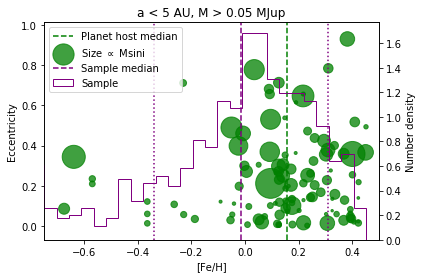

In [29]:
fig, ax = plt.subplots()
#plt.title('Eccentricity vs. Metallicity ([Fe/H] > -0.6)')
plt.title('a < 5 AU, M > 0.05 MJup')
ln1 = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                alpha=0.75, c='g', label=r'Size $\propto$ Msini')

#Accurately calculate median for planet hosts, don't duplicate metallicity for each planet.
unique_fe = np.unique(good_spec_filter.fe)
median_fe = np.median(unique_fe)
#mad_fe = astrostats.median_absolute_deviation(unique_fe)
mad_fe = astrostats.mad_std(unique_fe)

ln2 = ax.axvline(x=median_fe, c='green', ls='--', label='Planet host median')
#ax.axvline(x=median_fe+mad_fe, c='purple', ls='--')
#ax.axvline(x=median_fe-mad_fe, c='purple', ls='--')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Eccentricity')
ax.set_xlim([-0.75, 0.5])

ax2 = ax.twinx()
ln3 = ax2.hist(specmatch.fe, bins=50, histtype='step', color='purple', density=True, label='Sample')
median_sample_fe = np.median(specmatch.fe)
#mad_sample_fe = astrostats.median_absolute_deviation(specmatch.fe)
mad_sample_fe = astrostats.mad_std(specmatch.fe)
ln4 = ax2.axvline(x=median_sample_fe, c='purple', ls='--', label='Sample median')
ax.axvline(x=median_sample_fe+mad_sample_fe, c='purple', ls=':')
ax.axvline(x=median_sample_fe-mad_sample_fe, c='purple', ls=':')
ax2.set_ylabel('Number density')
#ax2.set_xlim([-0.75, 0.5])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2)

fig.savefig('planet_candidates/fe_eccentricity_hist.pdf')

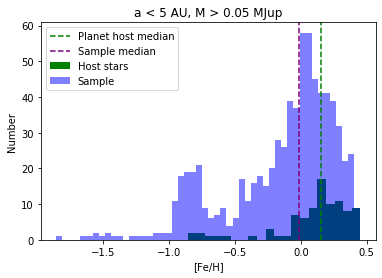

In [33]:
fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.05 MJup')
#ln1 = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
#                alpha=0.75, c='g', label=r'Size $\propto$ Msini')

# Accurately calculate median for planet hosts, don't duplicate metallicity for each planet.
unique_fe = np.unique(good_spec_filter.fe)
median_fe = np.median(unique_fe)
#mad_fe = astrostats.median_absolute_deviation(unique_fe)
mad_fe = astrostats.mad_std(unique_fe)

ln1 = ax.hist(unique_fe, bins=20, histtype='stepfilled', color='green', 
              alpha=1, density=False, label='Host stars')
ln2 = ax.axvline(x=median_fe, c='green', ls='--', label='Planet host median')
#ax.axvline(x=median_fe+mad_fe, c='purple', ls='--')
#ax.axvline(x=median_fe-mad_fe, c='purple', ls='--')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Number')
#ax.set_xlim([-0.75, 0.5])

#ax2 = ax.twinx()
ln3 = ax.hist(specmatch.fe, bins=50, histtype='stepfilled', color='blue', 
               alpha=0.5, density=False, label='Sample')
median_sample_fe = np.median(specmatch.fe)
#mad_sample_fe = astrostats.median_absolute_deviation(specmatch.fe)
mad_sample_fe = astrostats.mad_std(specmatch.fe)
ln4 = ax.axvline(x=median_sample_fe, c='purple', ls='--', label='Sample median')
#ax.axvline(x=median_sample_fe+mad_sample_fe, c='purple', ls=':')
#ax.axvline(x=median_sample_fe-mad_sample_fe, c='purple', ls=':')
#ax2.set_ylabel('Number density')
#ax2.set_xlim([-0.75, 0.5])

lines, labels = ax.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend()
#ax.legend(lines + lines2, labels + labels2, loc=0)

fig.savefig('planet_candidates/fe_two_hist_num.pdf')

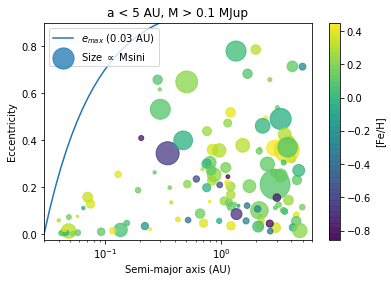

In [54]:
# Overplot peri-distance limit 0.03 AU.
axes = np.logspace(np.log10(0.03), np.log10(6))
e_max = 1 - 0.03/axes

fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.1 MJup')
im = ax.scatter(good_spec_filter.axis, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                c=good_spec_filter.fe, alpha=0.75, label=r'Size $\propto$ Msini')
ax.plot(axes, e_max, label=r'$e_{max}$ (0.03 AU)')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_xlim([0.03,6])
ax.set_ylim([-0.025,0.9])
ax.set_xscale('log')
ax.legend(loc=2)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('[Fe/H]')#, rotation=270)
fig.savefig('planet_candidates/axis_eccentricity_log_lim.pdf')

## Make a bunch of histograms.

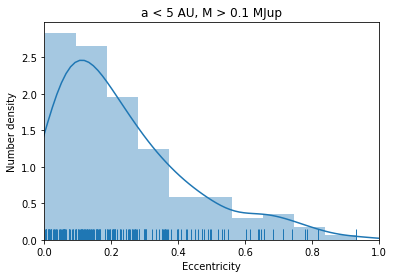

In [99]:
ax = sns.distplot(masses_planet.e, bins=10, rug=True)
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 5 AU, M > 0.1 MJup')
ax.set_xlim([0,1])
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_05.pdf')

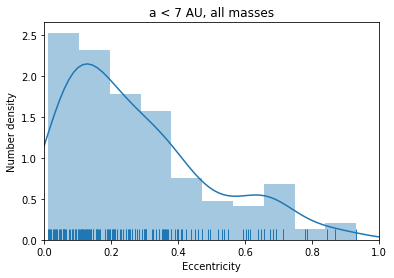

In [36]:
good_spec_all_mass = m_good_spec.query('axis < 7 and axis > 0.1')

ax = sns.distplot(good_spec_all_mass.e, bins=10, rug=True)
#ax.barplot()
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 7 AU, all masses')
ax.set_xlim([0,1])
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_all_masses.pdf')

## Fit Beta distribution to eccentricities. Define a likelihood function for the Beta distribution.

In [92]:
def beta(x, a, b):
    return spec.gamma(a+b)/(spec.gamma(a)*spec.gamma(b)) * x**(a-1) * (1-x)**(b-1)

def negbetalike(theta, x, y, yerr):
    a, b = theta
    #beta = spec.gamma(a+b)/(spec.gamma(a)*spec.gamma(b)) * x**(a-1) * (1-x)**(b-1)
    return 0.5*(np.sum((y-beta(x, a, b))**2*yerr**-2 + np.log(yerr**2)))

def fit_beta(x, y, yerr, a_init=0.867, b_init=3.03): # Kipping estimates
    fit = op.minimize(negbetalike, [a_init, b_init], args=(x, y, yerr),
                      method='Powell', options={'xtol': 1e-8, 'disp': True})
    return fit.x

In [122]:
e_pdf = np.histogram(masses_planet.e, range=[0,1], density=True)
fit = fit_beta(e_pdf[1][:-1], e_pdf[0], 0.01*np.ones(10), a_init=0.4, b_init=2.5)
print(fit)

Optimization terminated successfully.
         Current function value: 39712.517919
         Iterations: 1
         Function evaluations: 49
[1.00000034 3.78612157]


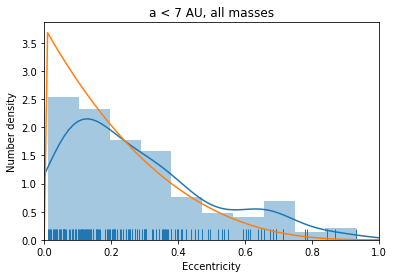

In [102]:
ax = sns.distplot(good_spec_all_mass.e, bins=10, rug=True)
#ax.barplot()
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 7 AU, all masses')
ax.set_xlim([0,1])

# Overplot Beta fit.
es = np.linspace(0, 1, num=100)
betas = beta(es, fit[0], fit[1])
ax.plot(es, betas)
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_beta_fit_719.pdf')

## Make observational stats histograms.

In [14]:
obs_stats = pd.read_csv('legacy_tables/observation_stats.csv')
obs_stats = obs_stats.query('baseline > 2922 and Nobs > 17')
obs_stats.columns

Index(['Unnamed: 0', 'Nobs', 'Nobs_CORAVEL', 'Nobs_apf', 'Nobs_j', 'Nobs_k',
       'Nobs_lick', 'Nobs_mcdonald', 'baseline', 'baseline_CORAVEL',
       'baseline_apf', 'baseline_j', 'baseline_k', 'baseline_lick',
       'baseline_mcdonald', 'med_err_CORAVEL', 'med_err_apf', 'med_err_j',
       'med_err_k', 'med_err_lick', 'med_err_mcdonald', 'name'],
      dtype='object')

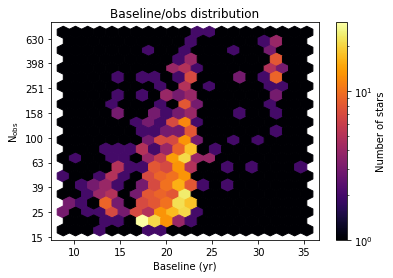

In [45]:
fig, ax = plt.subplots()
hb = ax.hexbin(obs_stats.baseline/365.25, np.log10(obs_stats.Nobs), 
               gridsize=20, bins='log', cmap='inferno')
ax.set_title("Baseline/obs distribution")
ax.set_xlabel('Baseline (yr)')
ax.set_ylabel(r'N$_\mathrm{obs}$')
#ax.set_ylabel(r'log$_{10}$(N$_\mathrm{obs}$)')

# Manually set Nobs logarithmic tick marks.
def format_fn(tick_val, tick_pos):
    return str(int(10**tick_val))

#ax.locator_params(axis='y', nbins=1)
ax.yaxis.set_major_formatter(FuncFormatter(format_fn))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of stars')
fig.savefig('legacy_tables/hist_base_nobs_2D.pdf')

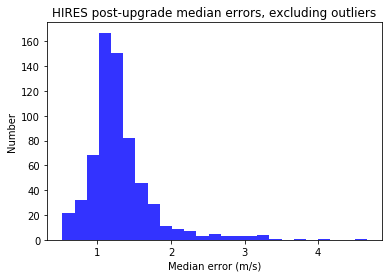

In [162]:
fig, ax = plt.subplots()
ax.hist(obs_stats.query('med_err_j < 5').med_err_j, bins=25, histtype='stepfilled', color='blue', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Median error (m/s)', ylabel='Number')
ax.set_title('HIRES post-upgrade median errors, excluding outliers')
fig.savefig('legacy_tables/hist_HIRES_post_err.pdf')

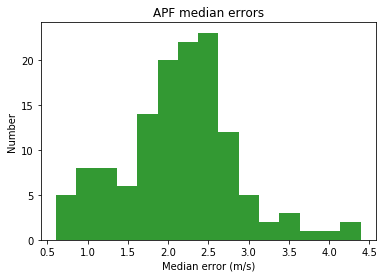

In [168]:
fig, ax = plt.subplots() #.query('med_err_j < 5')
ax.hist(obs_stats.med_err_apf, bins=15, histtype='stepfilled', color='green', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Median error (m/s)', ylabel='Number')
ax.set_title('APF median errors')
fig.savefig('legacy_tables/hist_APF_err.pdf')

Text(0.5, 1.0, 'Total baseline distribution')

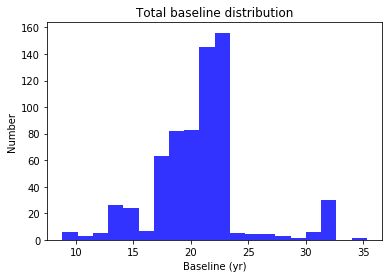

In [178]:
fig, ax = plt.subplots()
ax.hist(obs_stats.baseline/365.25, bins=20, histtype='stepfilled', color='blue', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Baseline (yr)', ylabel='Number')
ax.set_title('Total baseline distribution')

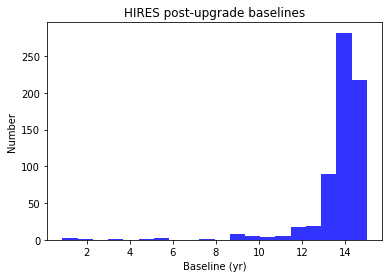

In [179]:
fig, ax = plt.subplots()
ax.hist(obs_stats.baseline_j/365.25, bins=20, histtype='stepfilled', color='blue', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Baseline (yr)', ylabel='Number')
ax.set_title('HIRES post-upgrade baselines')
fig.savefig('legacy_tables/hist_HIRES_post_base.pdf')

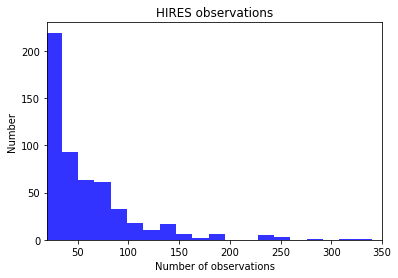

In [180]:
fig, ax = plt.subplots()
ax.hist(obs_stats.Nobs_j + obs_stats.Nobs_k, bins=20, histtype='stepfilled', color='blue', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Number of observations', ylabel='Number')
ax.set_xlim([20,350])
ax.set_title('HIRES observations')
fig.savefig('legacy_tables/hist_HIRES_nobs.pdf')

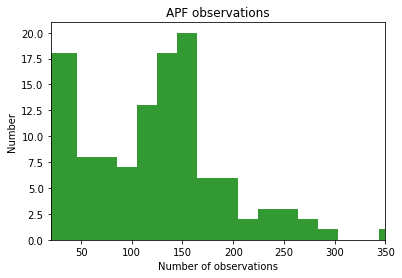

In [143]:
fig, ax = plt.subplots()
ax.hist(obs_stats.Nobs_apf, bins=20, histtype='stepfilled', color='green', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Number of observations', ylabel='Number')
ax.set_xlim([20,350])
ax.set_title('APF observations')
fig.savefig('legacy_tables/hist_APF_nobs.pdf')

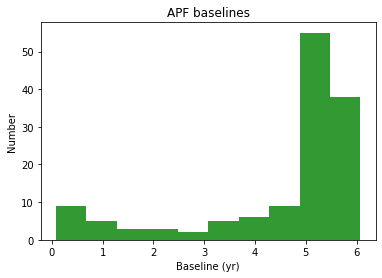

In [145]:
fig, ax = plt.subplots()
ax.hist(obs_stats.baseline_apf/365.25, bins=10, histtype='stepfilled', color='green', 
              alpha=0.8, density=False, label='Host stars')
ax.set(xlabel='Baseline (yr)', ylabel='Number')
ax.set_title('APF baselines')
fig.savefig('legacy_tables/hist_APF_base.pdf')

In [ ]:
axold = sns.distplot(np.log10(mold), rug=True)
axold.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axold.set_title('Known planets')
fig = axold.get_figure()
fig.savefig('planet_candidates/known_histogram.pdf')

In [126]:
masses_close = masses_planet.loc[masses_good.axis < 1]
masses_mid   = masses_planet.loc[np.logical_and(masses_good.axis >= 1, masses_good.axis <= 3)]
masses_far   = masses_planet.loc[masses_good.axis > 3]

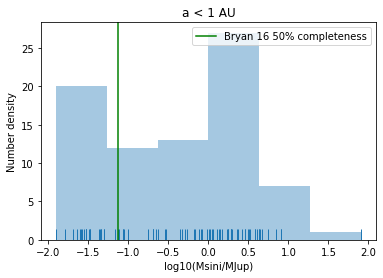

In [142]:
mclose = masses_close.mass
thresh_close = np.log10(0.075) #50% completeness threshold

axclose = sns.distplot(np.log10(mclose), kde=False, rug=True)
axclose.axvline(thresh_close, c='g', label='Bryan 16 50% completeness')
axclose.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axclose.set_title('a < 1 AU')
axclose.legend()

figclose = axclose.get_figure()
figclose.savefig('planet_candidates/close_histogram.pdf')

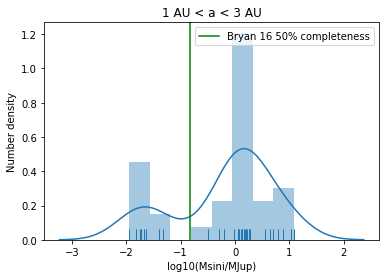

In [128]:
mmid = masses_mid.mass
thresh_mid = np.log10(0.15) #50% completeness threshold

axmid = sns.distplot(np.log10(mmid), rug=True)
axmid.axvline(thresh_mid, c='g', label='Bryan 16 50% completeness')
axmid.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axmid.set_title('1 AU < a < 3 AU')
axmid.legend()

figmid = axmid.get_figure()
figmid.savefig('planet_candidates/middle_histogram.pdf')

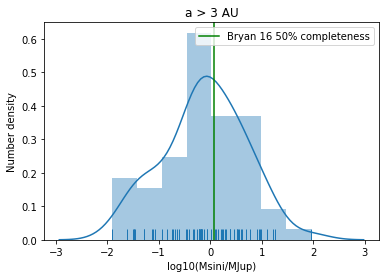

In [129]:
mfar = masses_far.mass
thresh_far = np.log10(1.2) #50% completeness threshold

axfar = sns.distplot(np.log10(mfar), rug=True)
axfar.axvline(thresh_far, c='g', label='Bryan 16 50% completeness')
axfar.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axfar.set_title('a > 3 AU')
axfar.legend()

figfar = axfar.get_figure()
figfar.savefig('planet_candidates/far_histogram.pdf')

## Make distributions of periods and period ratios.

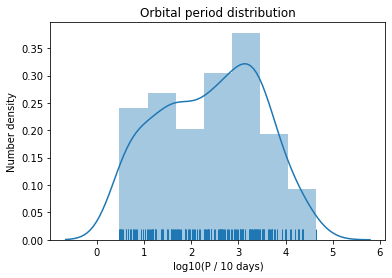

In [137]:
# Only use ratios below 20.
axper = sns.distplot(np.log10(masses_planet.per), rug=True)
axper.set(xlabel='log10(P / 10 days)', ylabel='Number density')
axper.set_title('Orbital period distribution')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_histogram.pdf')

In [133]:
def period_ratios(pers):
    ratios = []
    nplanets = len(pers)
    sorted = np.sort(pers)
    for i in np.arange(nplanets):
        for j in np.arange(i):
            ratios.append(sorted[i]/sorted[j])
    return ratios

In [134]:
systems = masses_planet.hostname.unique()

In [135]:
all_ratios = []
for system in systems:
    sys_db = masses_planet.query('hostname == "{}"'.format(system))#    .loc[masses_planet.hostname == system]
    if len(sys_db) > 1:
        sys_ratios = period_ratios(sys_db.per)
        all_ratios.append(sys_ratios)
all_ratios = np.concatenate(all_ratios)

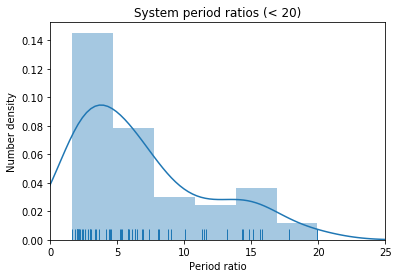

In [136]:
# Only use ratios below 20.
filtered_ratios = np.extract(all_ratios < 20, all_ratios)
axper = sns.distplot(filtered_ratios, rug=True)
axper.set_xlim([0,25])
axper.set(xlabel='Period ratio', ylabel='Number density')
axper.set_title('System period ratios (< 20)')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_ratio_histogram.pdf')

## Plot known legacy planets.

In [ ]:
fig, ax = plt.subplots()
plt.title('Recovered, known legacy planets')
ax.scatter(aold, mold, c='b', alpha=0.75)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Msini ($M_{Jup}$)')
fig.savefig('planet_candidates/mass_axis_known.pdf')

## Catalogue trend systems.

In [ ]:
trends = masses_only.loc[masses_only.per > 5*10**3]
len(trends)